#### My webScrapping project

##### importing the libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [46]:
url = 'https://www.hubertiming.com/results/2018MLK'
html = urlopen(url)

In [47]:
soup = BeautifulSoup(html)

In [48]:
title = soup.title

In [49]:
print(title.text)

Race results for the 2018 MLK Dream Run!


In [50]:
links = soup.find_all('a', href=True)

In [51]:
for link in links:
    print(link.get('href'))

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2018MLK10K#individual
/results/2018MLK15K#individual
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [52]:
data =[]
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    RowData = []
    for cel in row_list:
        RowData.append(cel.text)
    data.append(RowData)
print(data[4:])


[[], ['1', '1191', '\r\n\r\n                    MAX RANDOLPH\r\n\r\n                ', 'M', '29', 'WASHINGTON', 'DC', '16:48', '5:25', '\r\n\r\n                    1 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    1 of 33\r\n\r\n                ', '0:08', '16:56'], ['2', '1080', '\r\n\r\n                    NEED NAME KAISER RUNNER\r\n\r\n                ', 'M', '25', 'PORTLAND', 'OR', '17:31', '5:39', '\r\n\r\n                    2 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    2 of 33\r\n\r\n                ', '0:09', '17:40'], ['3', '1275', '\r\n\r\n                    DAN FRANEK\r\n\r\n                ', 'M', '52', 'PORTLAND', 'OR', '18:15', '5:53', '\r\n\r\n                    3 of 78\r\n\r\n                ', 'M 40-54', '\r\n\r\n                    1 of 27\r\n\r\n                ', '0:07', '18:22'], ['4', '1223', '\r\n\r\n                    PAUL TAYLOR\r\n\r\n                ', 'M', '54', 'PORTLAND', 'OR', '18:31', '5:58', '\r\n\r\

In [53]:
df = pd.DataFrame(data)

In [54]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
191,187,1254,\r\n\r\n CYNTHIA HARRIS\r\n...,F,64,PORTLAND,OR,1:07:51,21:53,\r\n\r\n 110 of 113\r\n\r\n...,F 55+,\r\n\r\n 14 of 14\r\n\r\n ...,1:19,1:09:10
192,188,1085,\r\n\r\n EBONY LAWRENCE\r\n...,F,30,PORTLAND,OR,1:08:12,22:00,\r\n\r\n 111 of 113\r\n\r\n...,F 21-39,\r\n\r\n 53 of 53\r\n\r\n ...,0:58,1:09:10
193,189,1170,\r\n\r\n ANTHONY WILLIAMS\r...,M,39,PORTLAND,OR,1:09:11,22:19,\r\n\r\n 78 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 33 of 33\r\n\r\n ...,0:08,1:09:19
194,190,2087,\r\n\r\n LEESHA POSEY\r\n\r...,F,43,PORTLAND,OR,1:33:53,30:17,\r\n\r\n 112 of 113\r\n\r\n...,F 40-54,\r\n\r\n 36 of 37\r\n\r\n ...,0:00,1:33:53
195,191,1216,\r\n\r\n ZULMA OCHOA\r\n\r\...,F,40,GRESHAM,OR,1:43:27,33:22,\r\n\r\n 113 of 113\r\n\r\n...,F 40-54,\r\n\r\n 37 of 37\r\n\r\n ...,0:00,1:43:27


In [55]:
headers_list = []
col_headers = soup.find_all("th")

for col in col_headers:
    headers_list.append(col.text)
print(headers_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [56]:
df.columns = headers_list

In [57]:
dff = df
dff

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,191,None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,78,None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,113,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,187,1254,\r\n\r\n CYNTHIA HARRIS\r\n...,F,64,PORTLAND,OR,1:07:51,21:53,\r\n\r\n 110 of 113\r\n\r\n...,F 55+,\r\n\r\n 14 of 14\r\n\r\n ...,1:19,1:09:10
192,188,1085,\r\n\r\n EBONY LAWRENCE\r\n...,F,30,PORTLAND,OR,1:08:12,22:00,\r\n\r\n 111 of 113\r\n\r\n...,F 21-39,\r\n\r\n 53 of 53\r\n\r\n ...,0:58,1:09:10
193,189,1170,\r\n\r\n ANTHONY WILLIAMS\r...,M,39,PORTLAND,OR,1:09:11,22:19,\r\n\r\n 78 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 33 of 33\r\n\r\n ...,0:08,1:09:19
194,190,2087,\r\n\r\n LEESHA POSEY\r\n\r...,F,43,PORTLAND,OR,1:33:53,30:17,\r\n\r\n 112 of 113\r\n\r\n...,F 40-54,\r\n\r\n 36 of 37\r\n\r\n ...,0:00,1:33:53


In [58]:
def rep(value):
    patterns = ['\r\n\r\n']
    
    for i in patterns:
        if i in value:
            value = value.replace(i, "")
    return value

In [59]:
rep(df.Name)

0                                                   None
1                                                   None
2                                                   None
3                                                   None
4                                                   None
                             ...                        
191    \r\n\r\n                    CYNTHIA HARRIS\r\n...
192    \r\n\r\n                    EBONY LAWRENCE\r\n...
193    \r\n\r\n                    ANTHONY WILLIAMS\r...
194    \r\n\r\n                    LEESHA POSEY\r\n\r...
195    \r\n\r\n                    ZULMA OCHOA\r\n\r\...
Name: Name, Length: 196, dtype: object

In [60]:
df.head(10)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,191,None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,78,None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,113,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,16:48,5:25,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
6,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,17:31,5:39,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
7,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,18:15,5:53,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
8,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,18:31,5:58,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38
9,5,1245,\r\n\r\n THEO KINMAN\r\n\r\...,M,22,,,19:31,6:17,\r\n\r\n 5 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 3 of 33\r\n\r\n ...,0:09,19:40


In [61]:
df.index

RangeIndex(start=0, stop=196, step=1)

In [62]:
df['Name'][8].split()

['PAUL', 'TAYLOR']

In [63]:
df['Name'][6]

'\r\n\r\n                    NEED NAME KAISER RUNNER\r\n\r\n                '

In [64]:
Gender = df['Gender Place']

In [65]:
df.head(10)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,191,None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,78,None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,113,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,16:48,5:25,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
6,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,17:31,5:39,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
7,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,18:15,5:53,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
8,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,18:31,5:58,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38
9,5,1245,\r\n\r\n THEO KINMAN\r\n\r\...,M,22,,,19:31,6:17,\r\n\r\n 5 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 3 of 33\r\n\r\n ...,0:09,19:40


In [66]:
df.drop(['Name'], axis =1, inplace = True)

In [67]:
df.drop(['Age Group Place'], axis =1, inplace = True)

In [68]:
df.drop(['Gender Place'], axis = 1 , inplace = True)

In [69]:
df.tail()

,Place,Bib,Gender,Age,City,State,Chip Time,Chip Pace,Age Group,Time to Start,Gun Time
191,187,1254,F,64,PORTLAND,OR,1:07:51,21:53,F 55+,1:19,1:09:10
192,188,1085,F,30,PORTLAND,OR,1:08:12,22:00,F 21-39,0:58,1:09:10
193,189,1170,M,39,PORTLAND,OR,1:09:11,22:19,M 21-39,0:08,1:09:19
194,190,2087,F,43,PORTLAND,OR,1:33:53,30:17,F 40-54,0:00,1:33:53
195,191,1216,F,40,GRESHAM,OR,1:43:27,33:22,F 40-54,0:00,1:43:27


In [70]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [71]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [72]:
df['State'] = LabelEncoder().fit_transform(df["State"])

In [73]:
df['City'] = LabelEncoder().fit_transform(df["City"])

In [74]:
df.head()

,Place,Bib,Gender,Age,City,State,Chip Time,Chip Pace,Age Group,Time to Start,Gun Time
0,None,None,2,None,22,6,None,None,None,None,None
1,Finishers:,191,2,None,22,6,None,None,None,None,None
2,Male:,78,2,None,22,6,None,None,None,None,None
3,Female:,113,2,None,22,6,None,None,None,None,None
4,None,None,2,None,22,6,None,None,None,None,None


In [75]:
df.isnull().sum()

Place            2
Bib              2
Gender           0
Age              5
City             0
State            0
Chip Time        5
Chip Pace        5
Age Group        5
Time to Start    5
Gun Time         5
dtype: int64

In [76]:
df.isna().any()

Place             True
Bib               True
Gender           False
Age               True
City             False
State            False
Chip Time         True
Chip Pace         True
Age Group         True
Time to Start     True
Gun Time          True
dtype: bool

In [77]:
df

,Place,Bib,Gender,Age,City,State,Chip Time,Chip Pace,Age Group,Time to Start,Gun Time
0,None,None,2,None,22,6,None,None,None,None,None
1,Finishers:,191,2,None,22,6,None,None,None,None,None
2,Male:,78,2,None,22,6,None,None,None,None,None
3,Female:,113,2,None,22,6,None,None,None,None,None
4,None,None,2,None,22,6,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
191,187,1254,0,64,14,3,1:07:51,21:53,F 55+,1:19,1:09:10
192,188,1085,0,30,14,3,1:08:12,22:00,F 21-39,0:58,1:09:10
193,189,1170,1,39,14,3,1:09:11,22:19,M 21-39,0:08,1:09:19
194,190,2087,0,43,14,3,1:33:53,30:17,F 40-54,0:00,1:33:53


In [78]:
df['Place'] = df['Place'].fillna(df.mean)
df['Bib'] = df['Bib'].fillna(df.mean)
df['Age'] = df['Age'].fillna(df.mean)
df['Chip Time'] =df['Chip Time'].fillna(df.mean)
df['Chip Pace'] = df['Chip Pace'].fillna(df.mean)
df['Age Group'] = df['Age Group'].fillna(df.mean)
df['Time to Start'] = df['Time to Start'].fillna(df.mean)
df['Gun Time'] = df['Gun Time'].fillna(df.mean)

In [35]:
len(df)

196

In [36]:
df.isnull().sum()

Place            0
Bib              0
Gender           0
Age              0
City             0
State            0
Chip Time        0
Chip Pace        0
Age Group        0
Time to Start    0
Gun Time         0
dtype: int64

In [37]:
df.columns

Index(['Place', 'Bib', 'Gender', 'Age', 'City', 'State', 'Chip Time',
       'Chip Pace', 'Age Group', 'Time to Start', 'Gun Time'],
      dtype='object')

<AxesSubplot:>

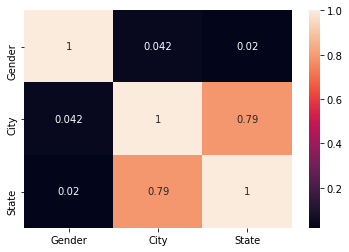

In [38]:
import seaborn as sns
sns.heatmap(df.corr(), annot =True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

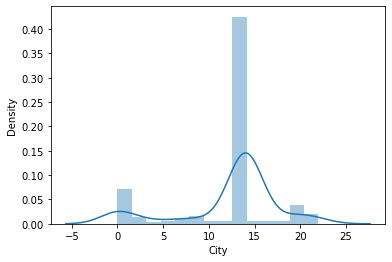

In [39]:
sns.distplot(df['City'])

In [ ]:
corr_columns = ['Place', 'Bib', 'Gender', 'Age', 'City', 'State', 'Chip Time',
       'Chip Pace', 'Age Group', 'Time to Start', 'Gun Time']

for col in corr_columns:
    sns.displot(df, kind = 'kde', multiple = 'stack')

In [ ]:
df